In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Roadmap

-> univariate analysis

-> bivariate analysis

-> missing values

-> outliers identification

-> feature engineering

-> scaling/transformation

# Model building

-> Base model: we must have base model

-> Logistic regression model followed by tree based model

-> Parameter tunning should be done for top 3 models only. once that is done we will build the stacking model

In [2]:
df = pd.read_csv("Hours.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Univariate Analysis



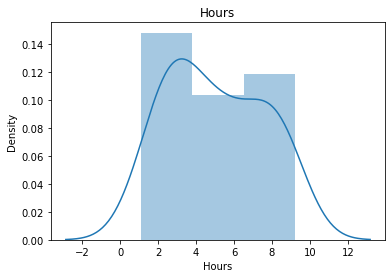

In [7]:
sns.distplot(df.Hours)
plt.title('Hours')
plt.show()

Hours are right skewed

In [8]:
df.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

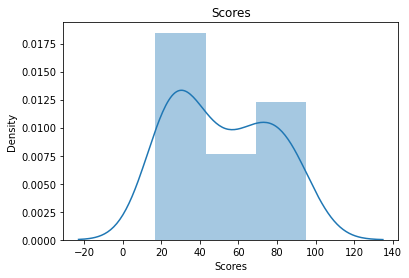

In [9]:
sns.distplot(df.Scores)
plt.title('Scores')
plt.show()

Scores are right skewed

# Bivariate Analysis

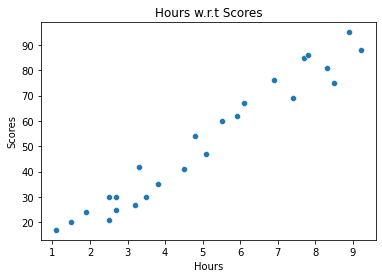

In [10]:
sns.scatterplot(x=df['Hours'], y=df['Scores'])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours w.r.t Scores")
plt.show()

As we can see the above plot there is a positive relation between number of hours studied and percent of scores

<AxesSubplot:>

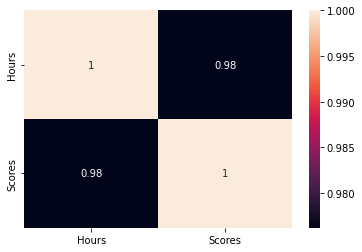

In [11]:
sns.heatmap(df.corr(), annot= True)

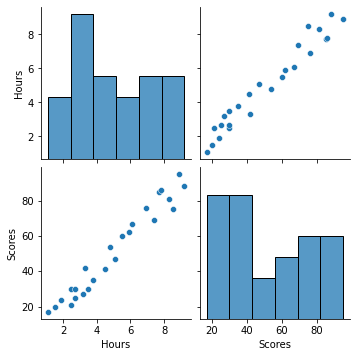

In [12]:
sns.pairplot(df)
plt.show()

# statistical test

In [13]:
import scipy.stats as stats

In [ ]:
#Ho : The data is normal
#Ha : The data is not normal

In [14]:
for i in df:
    print('pvalue for', i, 'is', stats.jarque_bera(df.loc[:,i]))
    
#since the pvalue>0.05, we fail to reject the Ho meaning data is normal

pvalue for Hours is Jarque_beraResult(statistic=1.8580336151250898, pvalue=0.3949418233594212)
pvalue for Scores is Jarque_beraResult(statistic=2.247338169134961, pvalue=0.32508483999924964)


# num vs num - T-test Ind

#Ho : There is no relation between hours and scores

#Ha : There is relation between Hours and Scores

In [15]:
from scipy.stats import ttest_ind

ttest_ind(df['Hours'], df['Scores'])

Ttest_indResult(statistic=-9.142690841077545, pvalue=4.377952611625229e-12)

since the pvalue <0.05, so we rejcet the null hypothesis, hence there is a relation between hours and scores

# Model building

In [16]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from statsmodels.api import OLS, add_constant

In [17]:
#split the data in train and test
from sklearn.model_selection import train_test_split

X = df.drop('Scores', axis = 1)
y = df['Scores']

xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.3, random_state = 100)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((17, 1), (8, 1), (17,), (8,))

In [18]:
#Linear Regression - stats model

temp_xtrain = add_constant(xtrain)
temp_xtest = add_constant(xtest)

model = OLS(ytrain, temp_xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           1.15e-11
Time:                        11:10:41   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.644      -5.260       8.250
Hours          9.8717      0.540     18.288      0.000       8.721      11.022
==============================================================================
Omnibus:                        4.576   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                1.488
Skew:                          -0.198   Prob(JB):                        0.475
Kurtosis:                       1.606   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Insights of OLS summary

1. R-squared value 95.7% indicates that approx 95% of the variation in the target variable is explained by the model.
2. The diff b/w r-squared and adj_r-squared are less, therefore the model is significate and good
3. pvalue of f_stats 1.15e-11 which indicates model is significant
4. from this we can form a linear eq.

In [ ]:
#checking scores for training and test set

In [19]:
prediction_tr = model.predict(temp_xtrain)
prediction_test = model.predict(temp_xtest)

rmse_xtrain = np.sqrt(mean_squared_error(ytrain,prediction_tr))
rmse_xtest = np.sqrt(mean_squared_error(ytest, prediction_test))

print('RMSE Train', rmse_xtrain)
print('RMSE Test', rmse_xtest)

#MAE

mae = mean_absolute_error(ytest, prediction_test)
print('MAE', mae)

RMSE Train 5.554519860948028
RMSE Test 5.067387845160841
MAE 4.762517892332271


# Linear Model

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [21]:
from sklearn.impute import SimpleImputer


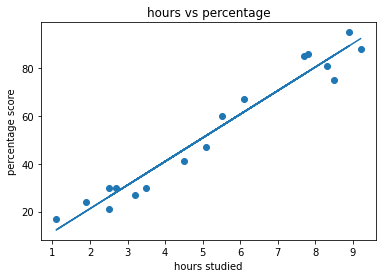

In [29]:
x_train_arr = xtrain.values
y_train_arr = ytrain.values

model = lr.fit(x_train_arr, y_train_arr)
#plotting the regression line

line = lr.coef_*x_train_arr+ lr.intercept_

#test data

plt.scatter(x_train_arr,y_train_arr)
plt.plot(x_train_arr, line.ravel())
plt.title('hours vs percentage')
plt.xlabel('hours studied')
plt.ylabel('percentage score')
plt.show()

In [ ]:
print('test score', lr.score(xtest, ytest))
print('training score', lr.score(xtrain, ytrain))

In [ ]:
y_pred = lr.predict(xtest)
y_pred

# comapring actual result to the predicted result

In [ ]:
df = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})
df

In [ ]:
#predict the score for 9.25 hours

print('number of hours = 9.25')
print('students who study 9.25 hrs/ day is', lr.predict([[9.25]]))


# evaluation the model

In [ ]:
print('Mean Absolute error: ', mean_absolute_error(ytest, y_pred))
print('Mean squared erroe: ', mean_squared_error(ytest, y_pred))
print('root mean squared error:', np.sqrt(mean_squared_error(ytest, y_pred)))
print('R-2:', r2_score(ytest, y_pred))

R-2 gives the score of model fit and in this case we have R-2 = 0.9309458862687437 which is great score for this model

# E N D